This movieReviewLearnIfPositive Jupyter Python Notebook is stored in my home dir tensorFlow/mlenv

In [6]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


Using TensorFlow backend.


In [7]:
import matplotlib.pyplot as plt
print("train_data:", train_data[0][0:50])
print("train_data.shape:",train_data.shape)
print("train_labels shape:", train_labels.shape)
print("train_labels:", train_labels[0:100])
#plt.plot(train_data[0])
#plt.scatter(train_data[0])

train_data: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447]
train_data.shape: (25000,)
train_labels shape: (25000,)
train_labels: [1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0
 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1
 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0]


So the final result of analyzing a 25,000 list of integers which corresponds to a single review on this movie is 1 positive review.  Or are there 25,000 reviews? of different lengths

In [8]:
m = min([min(sequence) for sequence in train_data])
print("min value in all sequences:", m)
max([max(sequence) for sequence in train_data])

min value in all sequences: 1


9999

It seems that the min value found is 1.  This might be a reserved index for the start of the sequence?
This "start of sequence" value is indeed at the start of train_data!

Notes on Regular Expression match used in following loop to get all matches--every word in train_data in the following case I guess.  The for loop returns integers which are then mapped by the reverse word index to their corresponding words.
'?'  Causes the resulting RE to match 0 or 1 repetitions of the preceding RE. ab? will match either ‘a’ or ‘ab’.
*?, +?, ??
The '*', '+', and '?' qualifiers are all greedy; they match as much text as possible

Sure enough this is a positive review corresponding with the one for train_label for it.

list comprehension using for loops works well if you are converting one list to another or one dict, enumeration etc to a list.  Also look for the append type for loops:

Any for loop that looks like this:

new_things = []
for ITEM in old_things:
    if condition_based_on(ITEM):
        new_things.append("something with " + ITEM)
Can be rewritten into a list comprehension like this:

new_things = ["something with " + ITEM for ITEM in old_things if condition_based_on(ITEM)]

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[100]])
print("decoded review: ", decoded_review)

decoded review:  ? i am a great fan of david lynch and have everything that he's made on dvd except for hotel room the 2 hour twin peaks movie so when i found out about this i immediately grabbed it and and what is this it's a bunch of ? drawn black and white cartoons that are loud and foul mouthed and unfunny maybe i don't know what's good but maybe this is just a bunch of crap that was ? on the public under the name of david lynch to make a few bucks too let me make it clear that i didn't care about the foul language part but had to keep ? the sound because my neighbors might have all in all this is a highly disappointing release and may well have just been left in the ? box set as a curiosity i highly recommend you don't spend your money on this 2 out of 10


In [10]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):   # no paren's needed around for parameters
        results[i, sequence] = 1.     # add a period to specify as float value.
    return results

x_train = vectorize_sequences(train_data)  
x_test = vectorize_sequences(test_data) # **** In the following, typed "v" then push tab to see type complete options--
                                        # then type enter key to complete first option, in this case "vectorize_sequences"
                                        # as with IntelliJ!

x_train[0]

# keras models and layers one must "add" arrays
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print("y_test:", y_test)

y_test: [0. 1. 1. ... 0. 0. 0.]


In [11]:
from keras import models
from keras import layers

model = models.Sequential()
# shape of ? is 25,000  why is input_shape 10,000?  I guess Chollet is using a partial_x_train set of 10000.  see below
# shape is 10,000 data rows in sample vector.  How many weights?  16?
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # activation strings are entered with single quotes.
model.add(layers.Dense(16, activation='relu'))  # the input shape is now known by the model from above.
model.add(layers.Dense(1, activation='sigmoid'))


In [12]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

In [13]:
print("shape of x_train: ",x_train.shape) # 25,000 rows of samples by 10k array of words/sample
x_val = x_train[:10000]  # first 10k review samples
print("shape of x_val: ",x_val.shape)
partial_x_train =  x_train[10000:] # from 10K to end at 25K resulting in 15K)
print("shape of partial_x_train: ",partial_x_train.shape)

y_val = y_train[:10000]  # first 10k reviews
print("shape of y_val: ",y_val.shape)
partial_y_train =  y_train[10000:] # from 10K to end at 25K resulting in 15K)
print("shape of partial_y_train: ",partial_y_train.shape)

shape of x_train:  (25000, 10000)
shape of x_val:  (10000, 10000)
shape of partial_x_train:  (15000, 10000)
shape of y_val:  (10000,)
shape of partial_y_train:  (15000,)


In [15]:
''' It seems to me that all train data is used in each epoch, 
                               cycling over about 30 batches of train data. '''

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,   
                   batch_size=512,
                   validation_data=(x_val,y_val)) # fit will check accuracy on this validation data for each epoch

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 314us/step - loss: 0.5084 - binary_accuracy: 0.7813 - val_loss: 0.3797 - val_binary_accuracy: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.3004 - binary_accuracy: 0.9047 - val_loss: 0.3004 - val_binary_accuracy: 0.8897
Epoch 3/20
15000/15000 [==============================] - 3s 197us/step - loss: 0.2179 - binary_accuracy: 0.9285 - val_loss: 0.3085 - val_binary_accuracy: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.1750 - binary_accuracy: 0.9437 - val_loss: 0.2840 - val_binary_accuracy: 0.8832
Epoch 5/20
15000/15000 [==============================] - 3s 183us/step - loss: 0.1427 - binary_accuracy: 0.9543 - val_loss: 0.2841 - val_binary_accuracy: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.1150 - binary_accuracy: 0.9650 - val_loss: 0.3166 - val_bi

Answered below: It seems like the loss continues to get lower with each epoch--this is not what was described in book--it indicated overfitting would occur?  Why not same?  starting keys can vary since they are random, but has the data changed?
Answer: Yes, loss of the TRAINING data continued to improve, but validation accuracy (val_binary_accuracy) plateau'd and the degraded slightly. And TEST/ validation loss improved (decreased for the first few epochs then increased.

In [16]:
history_dict = history.history
history_dict.keys()



dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

Key to key:  val stands for validation!  Easy to confuse with value, which really means nothing...

The above keys don't match the ordering and names of the ones in Listing 3.9.  Really only the binary was added.

However, the plots generated from the history match-up well with the book!


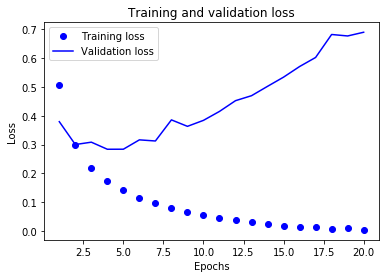

In [17]:
import matplotlib.pyplot as plt

training_loss = history_dict['loss']
#print("training_loss: ", training_loss) 
validation_loss = history_dict['val_loss']
#print("validation_loss: ", validation_loss) 

epochs = range(1,len(validation_loss) + 1)

plt.plot(epochs, training_loss, 'bo', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')

plt.ylabel('Loss')
plt.legend()
plt.show()

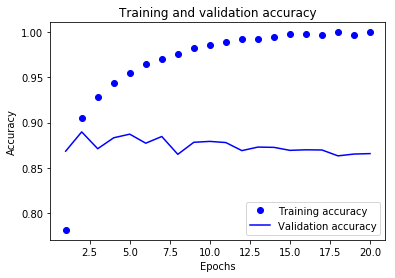

In [18]:
plt.plot(epochs, history_dict['binary_accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history_dict['val_binary_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')

plt.ylabel('Accuracy')
plt.legend()
plt.show()


The early peak in accuracy of the validation accuracy in the above plot shows overfitting.  The gradient-based refinements to the weights after the 4th epoch or so tended to actually degrade the accuracy of the validation set due to weights which only helped with the training sets, but do not generalize well to the other sets!   

Next run again with only 4 epochs to optimize the fit without overfitting.  Another difference is that we use all of the training data this time, then test it with the x_test data instead of a portion of the training data.

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # activation strings are entered with single quotes.
model.add(layers.Dense(16, activation='relu'))  # the input shape is now known by the model from above.
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

'''  It looks like I trained on 25,000 samples according to the output from
fitting the mode.  This indicates I used ALL of the data to train, such that
the validation and test data might have included the same values!!
So this would explain how I got validation values fits of 96%!!  


Epoch 4/4
25000/25000 ... loss: 0.1752 - binary_accuracy: 0.9389 - 
             val_loss: 0.1391 - val_binary_accuracy: 0.9577
fit complete

'''
history = model.fit(x_train,    # use all of the training data this time.  And test it with the x_text data.
                   y_train,
                   epochs=4,   
                   batch_size=512,
                   validation_data=(x_val,y_val)) 
print("fit complete")
results = model.evaluate(x_test, y_test)
print("results: ", results)

Train on 25000 samples, validate on 10000 samples
Epoch 1/4
25000/25000 [==============================] - 4s 160us/step - loss: 0.4749 - binary_accuracy: 0.8217 - val_loss: 0.3028 - val_binary_accuracy: 0.9091
Epoch 2/4
25000/25000 [==============================] - 4s 164us/step - loss: 0.2666 - binary_accuracy: 0.9096 - val_loss: 0.2006 - val_binary_accuracy: 0.9333
Epoch 3/4
25000/25000 [==============================] - 4s 156us/step - loss: 0.1987 - binary_accuracy: 0.9292 - val_loss: 0.1621 - val_binary_accuracy: 0.9442
Epoch 4/4
25000/25000 [==============================] - 4s 164us/step - loss: 0.1679 - binary_accuracy: 0.9402 - val_loss: 0.1466 - val_binary_accuracy: 0.9500
fit complete
25000/25000 [==============================] - 2s 95us/step
results:  [0.3238554546260834, 0.87308]


It seems that results shows the total validation acc from all epochs.  This is definitely less that the 95% achieved in validation!

In [20]:
predict = model.predict(x_test)
print ("predict: ", predict)
print ("x_test.shape: ", x_test.shape)

predict:  [[0.13560075]
 [0.9997118 ]
 [0.27816266]
 ...
 [0.07139967]
 [0.0428379 ]
 [0.47383907]]
x_test.shape:  (25000, 10000)


Since x_test is already encoded as 25000 arrays of 1's and 0's it needs to be converted back to the 

In [ ]:
review_index = 0
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in x_test[review_index][i]])
print("Decoded review prediction where 0 is negative, 1 is positive: ", predict[0][review_index])
print("Text of decoded review: ", decoded_review)

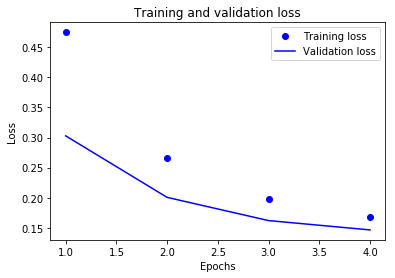

In [21]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()

training_loss = history_dict['loss']
#print("training_loss: ", training_loss) 
validation_loss = history_dict['val_loss']
#print("validation_loss: ", validation_loss) 

epochs = range(1,len(validation_loss) + 1)

plt.plot(epochs, training_loss, 'bo', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')

plt.ylabel('Loss')
plt.legend()
plt.show()

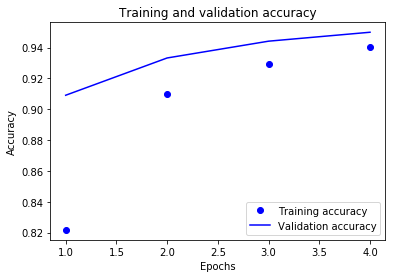

In [22]:
plt.plot(epochs, history_dict['binary_accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history_dict['val_binary_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')

plt.ylabel('Accuracy')
plt.legend()
plt.show()

It looks like I achieved 95% validation accuracy on  in the final epoch!   Why did we overfit in the second epoch in the original run, yet haven't yet over fit here?  Likely due to 25,000 training samples vs 10,000 in the overfit check?